## Credit Card Fraud Detection

The primary objective of credit card fraud detection is to identify and prevent unauthorized transactions on credit card accounts to minimize financial losses for both customers and financial institutions.

There are some key goals for fraud detection :
* Protecting Customer Assets
* Minimizing Financial Losses
* Reducing Chargebacks
* Improving Customer Trust and Confidence
* Enhancing Operational Efficiency
* Analyzing Fraud Patterns and Trends

There are some primary challeneges involved in credit card fraud detection  like
* Large amount of data is processed every day and the model build must be fast enough to respond to the scam in time.
* Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones.
* Data availability as the data is mostly private.
* Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
df=pd.read_csv(r"C:\Users\satyaki basak\Downloads\creditcard.csv\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* There is no null values. So we don't need to handle missing value.

* Their are 31 columns in dataset in which features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Their is a column named class in whose value is 0 if transaction is legitimate(not fraud) and 1 if it is fraud.

In [6]:
df.shape

(284807, 31)

In [7]:
#Distribution of Genuine and fraudelent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
Name: Time_Hr, dtype: float64


Text(0, 0.5, 'Transactions')

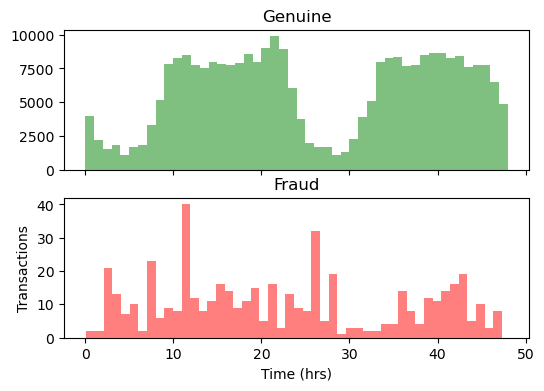

In [8]:
#plot the graph showing the similarity of legitimate transaction and fraud transaction with respect to time variable

df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].head(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,4))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('Transactions')

Text(0, 0.5, '# transactions')

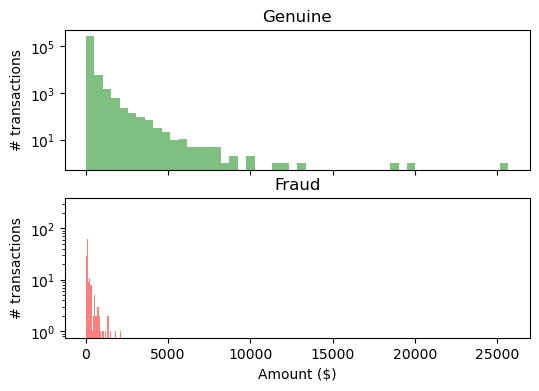

In [9]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,4), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine')
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud')
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

* We can clearly see a vast difference in the both graphs i.e Genuine and Fraud. Also the main point is that in genuine(Legitimate transaction) the transactions of more than 10k are done but in fraud cases no transactions are more than 10k

In [10]:
#Separting genuine and fraud data for analysis 
genuine=df[df.Class==0]
fraud=df[df.Class==1]

In [11]:
genuine.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hr
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


In [12]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hr
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,0.112778
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0.131111
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,1.239444
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,1.940556
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,2.088611


In [13]:
print(genuine.shape)
print(fraud.shape)

(284315, 32)
(492, 32)


In [14]:
#statistical measure on amount col
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
outlierFraction = len(fraud)/float(len(genuine))
print(outlierFraction)

0.0017304750013189597


* Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced

In [17]:
#comparing values for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hr
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,26.343945
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,22.429669


In [18]:
print(df['Amount'].max())
print(df['Amount'].min())

25691.16
0.0


* By seeing data values of feature Amount lies in range of 0 to 25691.16 which is obviously very wide range. So we need to scale its value between (-1,1) by applying Standardization technique

In [19]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000278,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000556,-0.073403


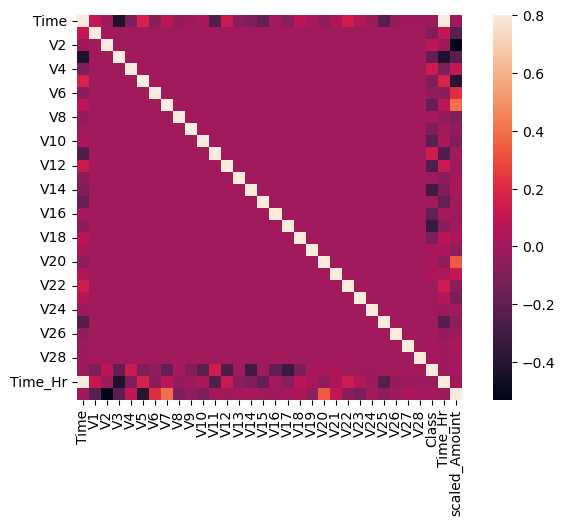

In [21]:
#Plotting the Correlation Matrix
corrmat = df.corr()
fig = plt.figure(figsize = (8, 5))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

* In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount.

#### Under-Sampling

* Here we can see that a large amount of unbalance data present.To handle this situation we use undersampling method.
* We build a sample dataset containing similar distribution of genuine txn and fraud txn.

* Here number of fraudulent txn =492 
* then we draw a 492 sample from genuine txn

In [22]:
genuine_sample=genuine.sample(n=492)

In [23]:
#Concatenate two new dataframe
df1=pd.concat([genuine_sample,fraud],axis=0)

In [24]:
df1.shape

(984, 32)

In [25]:
df1['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [26]:
#Splitting the dataset into features and targets
x=df.iloc[:,:-3].values
y=df.iloc[:,-3].values

In [27]:
print(x)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ... -1.89114844e-01
   1.33558377e-01 -2.10530535e-02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  1.25894532e-01
  -8.98309914e-03  1.47241692e-02]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -1.39096572e-01
  -5.53527940e-02 -5.97518406e-02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ... -8.73705959e-02
   4.45477214e-03 -2.65608286e-02]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  5.46668462e-01
   1.08820735e-01  1.04532821e-01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -8.18267121e-01
  -2.41530880e-03  1.36489143e-02]]


In [28]:
print(y)

[0 0 0 ... 0 0 0]


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
#Split dataset into trainning and testing data
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(x.shape,xtr.shape,xts.shape)

(284807, 29) (227845, 29) (56962, 29)


Here we going to predict catagorical variables of class(0 or 1) so we are going to use two classification model
* Logistic Regression


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model1=LogisticRegression()

In [34]:
#training dataset on Logistc reg model
model1.fit(xtr,ytr)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
#predicting test set result
from sklearn.preprocessing import StandardScaler


In [36]:
y_pred=model1.predict(xts)
print(y_pred)

[0 0 0 ... 0 0 0]


In [37]:
y_pred.reshape(len(y_pred),1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [38]:
yts

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), yts.reshape(len(yts),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [40]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [41]:
print("The model used is Logistic Regression")

acc = accuracy_score(yts, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yts, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(yts, y_pred)
print("The recall is {}".format(rec))

MCC = matthews_corrcoef(yts, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Logistic Regression
The accuracy is 0.9991748885221726
The precision is 0.7078651685393258
The recall is 0.75
The Matthews correlation coefficient is0.728215994015355


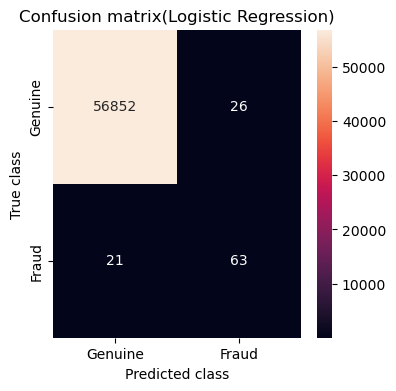

In [50]:
# printing the confusion matrix
LABELS = ['Genuine', 'Fraud']
conf_matrix = confusion_matrix(yts, y_pred)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix(Logistic Regression)")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [43]:
!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [45]:
from xgboost import XGBClassifier
model2=XGBClassifier()

In [46]:
model2.fit(xtr,ytr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred1=model2.predict(xts)
cm1=confusion_matrix(yts,y_pred1)
print(cm1)

[[56871     7]
 [   16    68]]


In [49]:
print("The model used is XGBoost Classifier")

acc1 = accuracy_score(yts, y_pred1)
print("The accuracy is {}".format(acc1))

prec1 = precision_score(yts, y_pred1)
print("The precision is {}".format(prec1))

rec1 = recall_score(yts, y_pred1)
print("The recall is {}".format(rec1))

MCC1 = matthews_corrcoef(yts, y_pred1)
print("The Matthews correlation coefficient is{}".format(MCC1))

The model used is XGBoost Classifier
The accuracy is 0.9995962220427653
The precision is 0.9066666666666666
The recall is 0.8095238095238095
The Matthews correlation coefficient is0.856521464175764


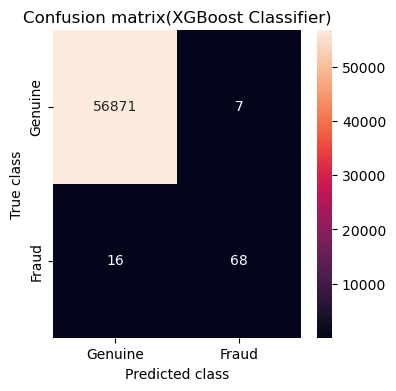

In [51]:
LABELS = ['Genuine', 'Fraud']
conf_matrix1 = confusion_matrix(yts, y_pred1)
plt.figure(figsize =(4, 4))
sns.heatmap(conf_matrix1, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix(XGBoost Classifier)")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Summary of Credit Card Fraud Detection Using Machine Learning

In this project, we developed and evaluated a machine learning model to detect fraudulent transactions in credit card data. The objective was to build a robust, accurate, and scalable system that minimizes false positives and effectively identifies fraudulent activities to help financial institutions reduce fraud-related losses and enhance customer trust.

* We utilized a publicly available credit card transaction dataset containing both fraudulent and legitimate transactions. The dataset was highly imbalanced, with fraudulent transactions constituting a small fraction of the total.
* Preprocessing steps included normalizing numerical features and balancing the dataset.
* We use under sampling to handle the large imbalance data and to secure similar distribution.
* Here we want to estimate the catagorical variable so we used just simple logistic regression model and XGBoost Classifier.
* Models were evaluated using key metrics such as Accuracy, Precision, Recall, Confusion matrix, Mathhews corr to assess their ability to differentiate between fraudulent and non-fraudulent transactions.
* The developed model is expected to significantly reduce the financial impact of fraud by accurately identifying suspicious transactions, enabling timely intervention by financial institutions.


## Conclusion

The project successfully demonstrated the effectiveness of machine learning models in detecting credit card fraud with high accuracy and robustness. Implementing this solution in real-world scenarios can provide substantial benefits, such as improved fraud detection rates, reduced false positives, and enhanced customer trust and experience. Continuous monitoring, regular updates, and adaptation to new fraud tactics will be essential to maintain and improve the model's performance over time.

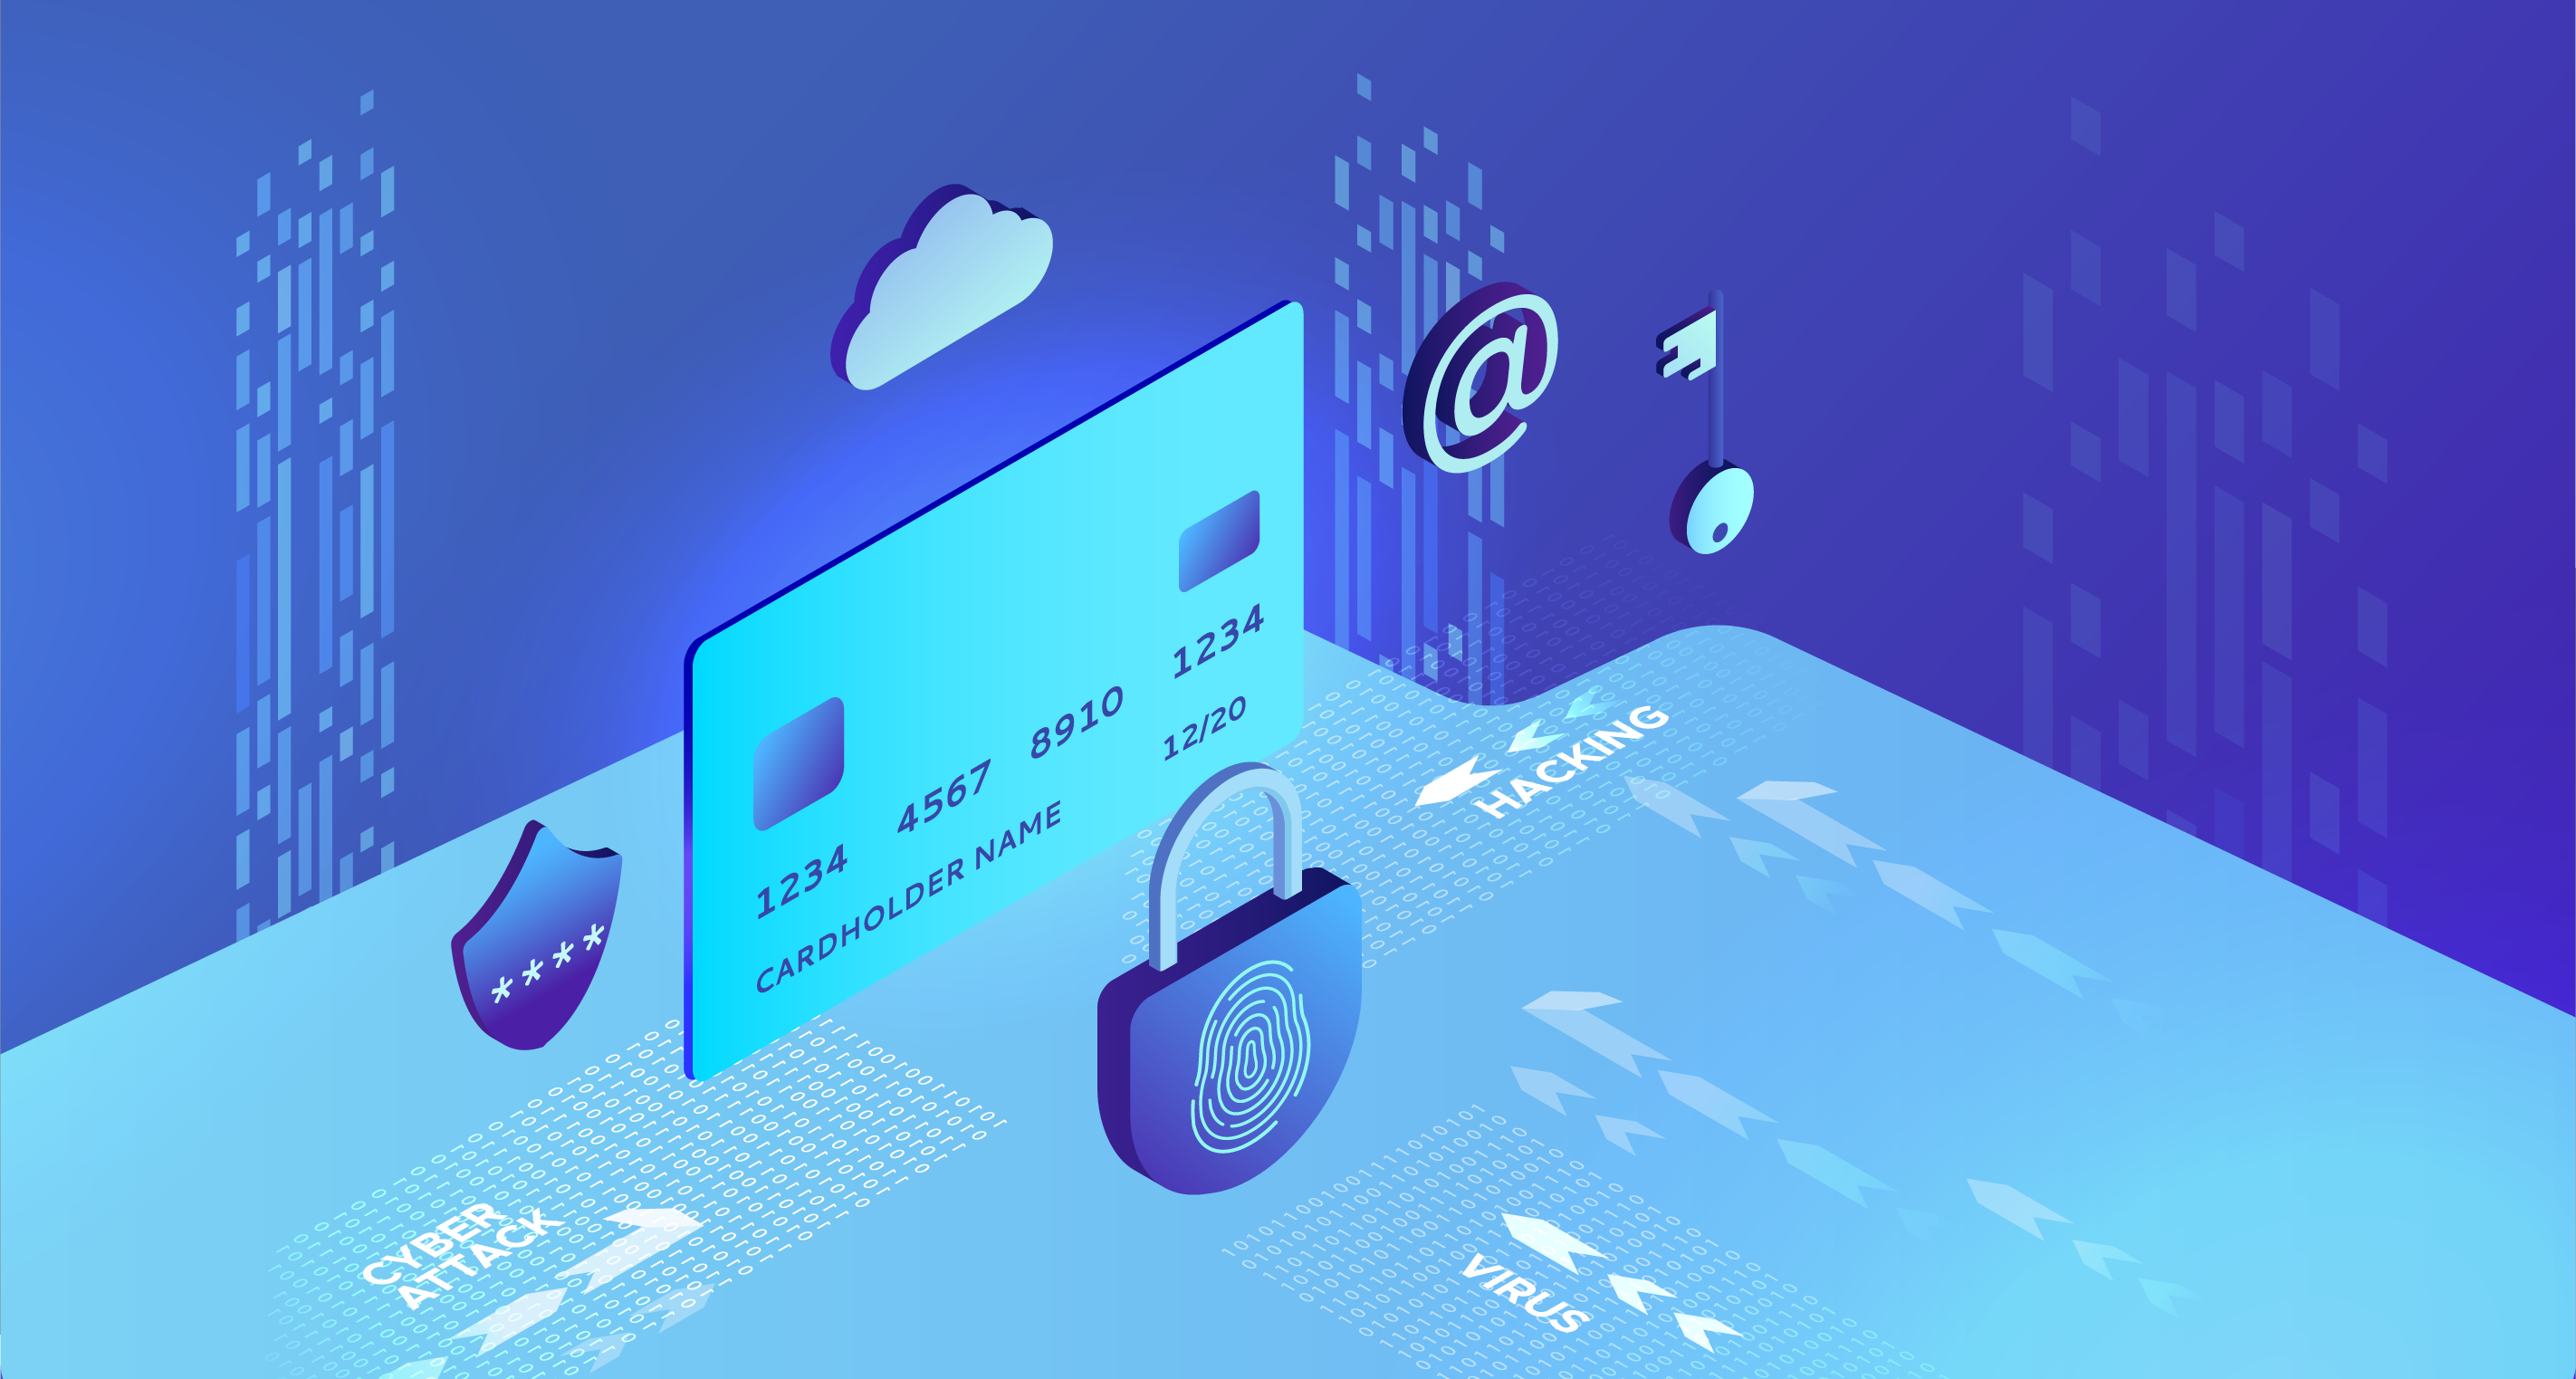